In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gpt2/tensorflow2/1/1/rust_model.ot
/kaggle/input/gpt2/tensorflow2/1/1/config.json
/kaggle/input/gpt2/tensorflow2/1/1/merges.txt
/kaggle/input/gpt2/tensorflow2/1/1/64-fp16.tflite
/kaggle/input/gpt2/tensorflow2/1/1/tokenizer.json
/kaggle/input/gpt2/tensorflow2/1/1/vocab.json
/kaggle/input/gpt2/tensorflow2/1/1/tf_model.h5
/kaggle/input/gpt2/tensorflow2/1/1/64.tflite
/kaggle/input/gpt2/tensorflow2/1/1/pytorch_model.bin
/kaggle/input/gpt2/tensorflow2/1/1/64-8bits.tflite
/kaggle/input/gpt2/tensorflow2/1/1/model.safetensors
/kaggle/input/gpt2/tensorflow2/1/1/flax_model.msgpack
/kaggle/input/gpt2/tensorflow2/1/1/generation_config.json
/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv
/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv
/kaggle/input/gpt2-essays-generated/gpt2_new_ge

In [54]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [55]:
def generate_random_alphanumeric(length=8):
    alphanumeric_chars = 'abcdefghijklmnopqrstuvwxyz0123456789'
    return ''.join(np.random.choice(list(alphanumeric_chars), length))

In [56]:
df_temp1 = pd.read_csv("/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv")
df_temp1['id'] = df_temp1.apply(lambda row: generate_random_alphanumeric(), axis=1)
df_temp1['id'] = df_temp1['id'].astype(str)
df_temp1.rename(columns={'label': 'generated'}, inplace=True)
df_temp2 = pd.read_csv("/kaggle/input/gpt2-essays-generated/gpt2_new_generated_essays.csv")
df_temp2.rename(columns={'predicted': 'generated'}, inplace=True)
df_temp2['generated'] = int(1)
 
df = pd.concat([df_temp1, df_temp2], ignore_index=True)
df['source'].fillna('GPT-2', inplace=True)
df['RDizzl3_seven'].fillna(True, inplace=True)
 
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)
 
 
# Creazione di un oggetto tf.data.Dataset per il set di addestramento
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['generated'].values))
 
# Creazione di un oggetto tf.data.Dataset per il set di test
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['text'].values, test_df['generated'].values))
 
print(train_dataset.element_spec)
print(train_dataset.cardinality().numpy())
print(test_dataset.element_spec)
print(test_dataset.cardinality().numpy())

(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
43500
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
10875


In [57]:
df

,text,generated,prompt_name,source,RDizzl3_seven,id
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,3wzcdy5t
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,zx3ybjnm
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,g6uopfil
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,j4lwkcgb
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,jcofgwuh
...,...,...,...,...,...,...
54370,Grades for extracurricular activities in schoo...,1,Grades for extracurricular activities,GPT-2,True,0abwlr77
54371,"Mandatory extracurricular activities,"" said Ms...",1,Mandatory extracurricular activities,GPT-2,True,oowwx86a
54372,Grades for extracurricular activities were div...,1,Grades for extracurricular activities,GPT-2,True,026qrvfc
54373,"Driverless cars can drive in a vacuum, so to s...",1,Driverless cars,GPT-2,True,lu665s66


In [58]:
df.describe()

,generated
count,54375.000000
mean,0.496625
std,0.499993
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [59]:
df.isna().sum()

text             0
generated        0
prompt_name      0
source           0
RDizzl3_seven    0
id               0
dtype: int64

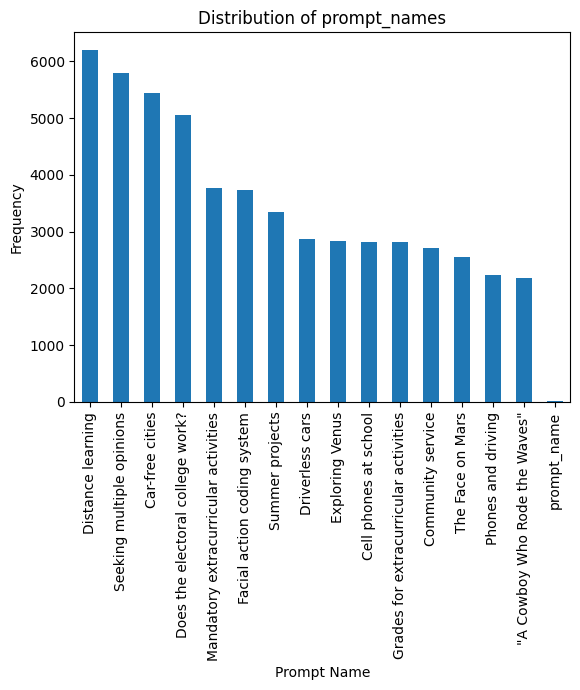

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
 
df['prompt_name'].value_counts().plot(kind='bar')

plt.title('Distribution of prompt_names')
plt.xlabel('Prompt Name')
plt.ylabel('Frequency')
plt.show()

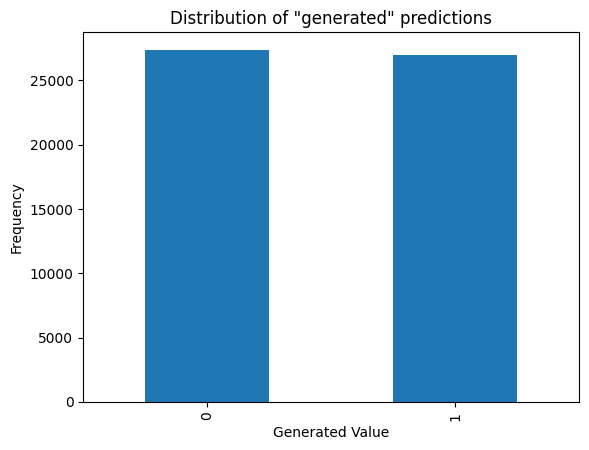

In [61]:
df['generated'].value_counts().plot(kind='bar')
 
plt.title('Distribution of "generated" predictions')
plt.xlabel('Generated Value')
plt.ylabel('Frequency')
plt.show()

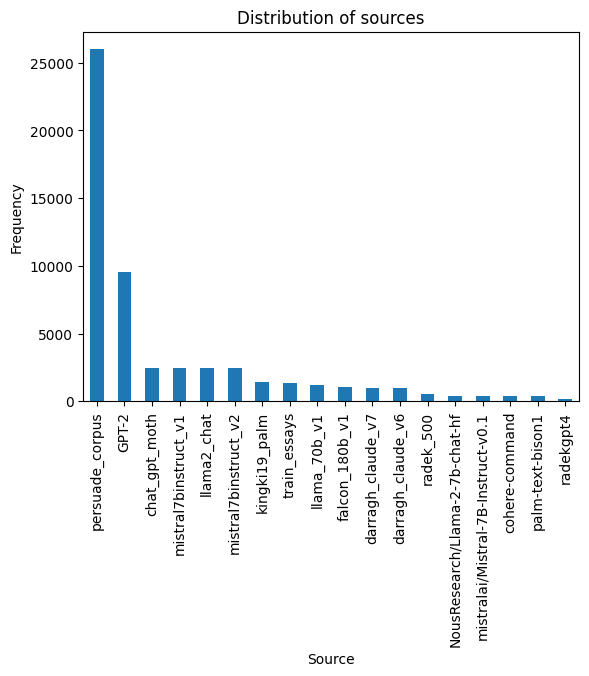

In [62]:
df['source'].value_counts().plot(kind='bar')
 
plt.title('Distribution of sources')
plt.xlabel('Source')
plt.ylabel('Frequency')
 
plt.show()

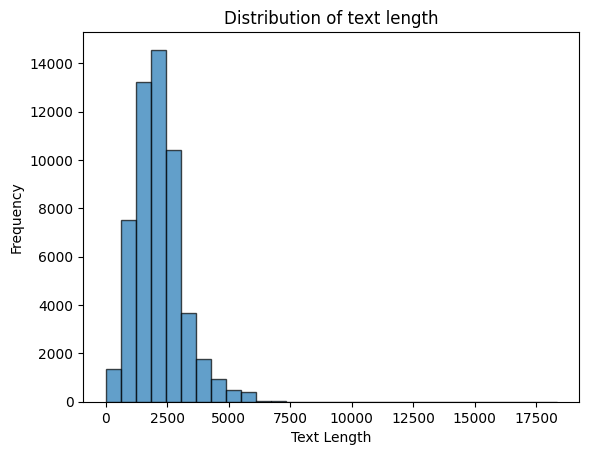

In [63]:
df['text_length'] = df['text'].apply(len)
 
plt.hist(df['text_length'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of text length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

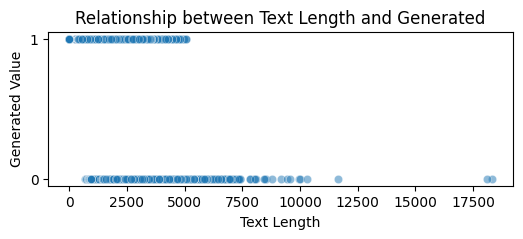

In [64]:
plt.figure(figsize=(6, 2))
sns.scatterplot(x='text_length', y='generated', data=df, alpha=0.5)
plt.yticks([0, 1])
 
plt.title('Relationship between Text Length and Generated')
plt.xlabel('Text Length')
plt.ylabel('Generated Value')
 
plt.show()

In [65]:
'''
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import random
import torch

model_name = "/kaggle/input/gpt2/tensorflow2/1/1"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
df_gen = pd.DataFrame(columns=['id', 'prompt_name', 'text', 'predicted'])  # Inizializza il DataFrame

def generate_text(prompt, min_length=400, max_length=600):
    while True:
        input_ids = tokenizer.encode(prompt, return_tensors="pt", max_length=512,truncation=True)
        attention_mask = torch.ones(input_ids.shape, dtype=torch.long)
        output = model.generate(input_ids, attention_mask=attention_mask, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, do_sample=True)
        generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

        if len(generated_text) >= min_length:
            return generated_text

        
prompts = df['prompt_name'].unique().tolist()
prompts.remove('"A Cowboy Who Rode the Waves"')

for i in range(0,500):
    prompt = random.choice(prompts)
    generated_text = generate_text(prompt)
    df_gen.loc[len(df_gen)] = {'id': generate_random_alphanumeric(), 'prompt_name': prompt, 'text': generated_text, 'predicted': 1}
    df_gen[['id', 'prompt_name', 'predicted','text']].to_csv('/kaggle/working/gpt2_text.csv',index=False)
    print(i)
    
'''

'\nfrom transformers import GPT2LMHeadModel, GPT2Tokenizer\nimport random\nimport torch\n\nmodel_name = "/kaggle/input/gpt2/tensorflow2/1/1"\nmodel = GPT2LMHeadModel.from_pretrained(model_name)\ntokenizer = GPT2Tokenizer.from_pretrained(model_name)\ndf_gen = pd.DataFrame(columns=[\'id\', \'prompt_name\', \'text\', \'predicted\'])  # Inizializza il DataFrame\n\ndef generate_text(prompt, min_length=400, max_length=600):\n    while True:\n        input_ids = tokenizer.encode(prompt, return_tensors="pt", max_length=512,truncation=True)\n        attention_mask = torch.ones(input_ids.shape, dtype=torch.long)\n        output = model.generate(input_ids, attention_mask=attention_mask, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, do_sample=True)\n        generated_text = tokenizer.decode(output[0], skip_special_tokens=True)\n\n        if len(generated_text) >= min_length:\n            return generated_text\n\n        \nprompts = df[\'prompt_name\']

In [66]:
BUFFER_SIZE = 15000
BATCH_SIZE = 128

In [67]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [68]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [69]:
embedding_layer = tf.keras.layers.Embedding(1000,5)

In [70]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 16, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [71]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=3,
                    validation_data=test_dataset,
                    validation_steps=20)

Epoch 1/3


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_true = test_df['generated'].values
y_scores = model.predict(test_dataset).reshape(-1)

plot_roc_curve(y_true, y_scores)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    
    plt.figure(figsize=(8, 8))
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

y_true = test_df['generated'].values
y_pred = (model.predict(test_dataset).reshape(-1) > 0.5).astype(int)

plot_confusion_matrix(y_true, y_pred)

In [ ]:
submission_df = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/test_essays.csv")
text_column = submission_df['text']

text_data = text_column.values

predictions = model.predict(text_data)

rounded_predictions = predictions.round(1)

submission_df['generated'] = rounded_predictions

submission_df[['id','generated']].to_csv('/kaggle/working/submission.csv',index=False)
print(rounded_predictions)

print(test_df.info())

In [ ]:
text_column = test_df['text']

text_data = text_column.values

predictions = model.predict(text_data)

rounded_predictions = predictions.round(1)

test_df['prediction'] = rounded_predictions

test_df[['generated','prediction']].to_csv('/kaggle/working/results.csv',index=False)

print(test_df['generated'])
print(rounded_predictions)